In [441]:
import os
import numpy as np
import torch
from torch.optim import Adam
from torchvision import models
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable



class Net(nn.Module):
    def __init__(self,):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, (3,6))
        self.norm1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(3, 6)
        self.conv2 = nn.Conv2d(64, 32, (3,6))
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(3, 6)
        self.conv3 = nn.Conv2d(32, 32, (3,6))
        self.norm3 = nn.BatchNorm2d(32)
        self.pool3 = nn.MaxPool2d(3,6)
        self.fc1 = nn.Linear(192, 50)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc2 = nn.Linear(64, 50)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.norm2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = F.relu(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.softmax(x)
        return x

In [191]:
model = torch.load("../CNN_Non_Hierarchical.pt")
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (dropout): Dropout2d(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=50, bias=True)
  (softmax): Softmax(dim=None)
)


In [158]:
print(*list(model.children()))

Conv2d(1, 32, kernel_size=(9, 9), stride=(1, 1)) Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1)) BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False) Linear(in_features=256, out_features=128, bias=True) Dropout2d(p=0.2, inplace=False) Linear(in_features=128, out_features=64, bias=True) Linear(in_features=64, out_features=50, bias=True) Softmax(dim=None)


## Forward Visualization

In [437]:
# original spectrogram
example_path = "../input_images/1-51805-C-33.npy"
im = np.load(example_path)
plt.cla()
ax = plt.imshow(im)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/original_image.jpg")

In [318]:
# first conv
X = np.expand_dims(im, axis=0)
X = np.expand_dims(X, axis=0)
X = torch.from_numpy(X)
X = Variable(X, requires_grad=False)
conv1 = nn.Sequential(*list(model.children()))[0]
X = conv1(X)

<IPython.core.display.Javascript object>


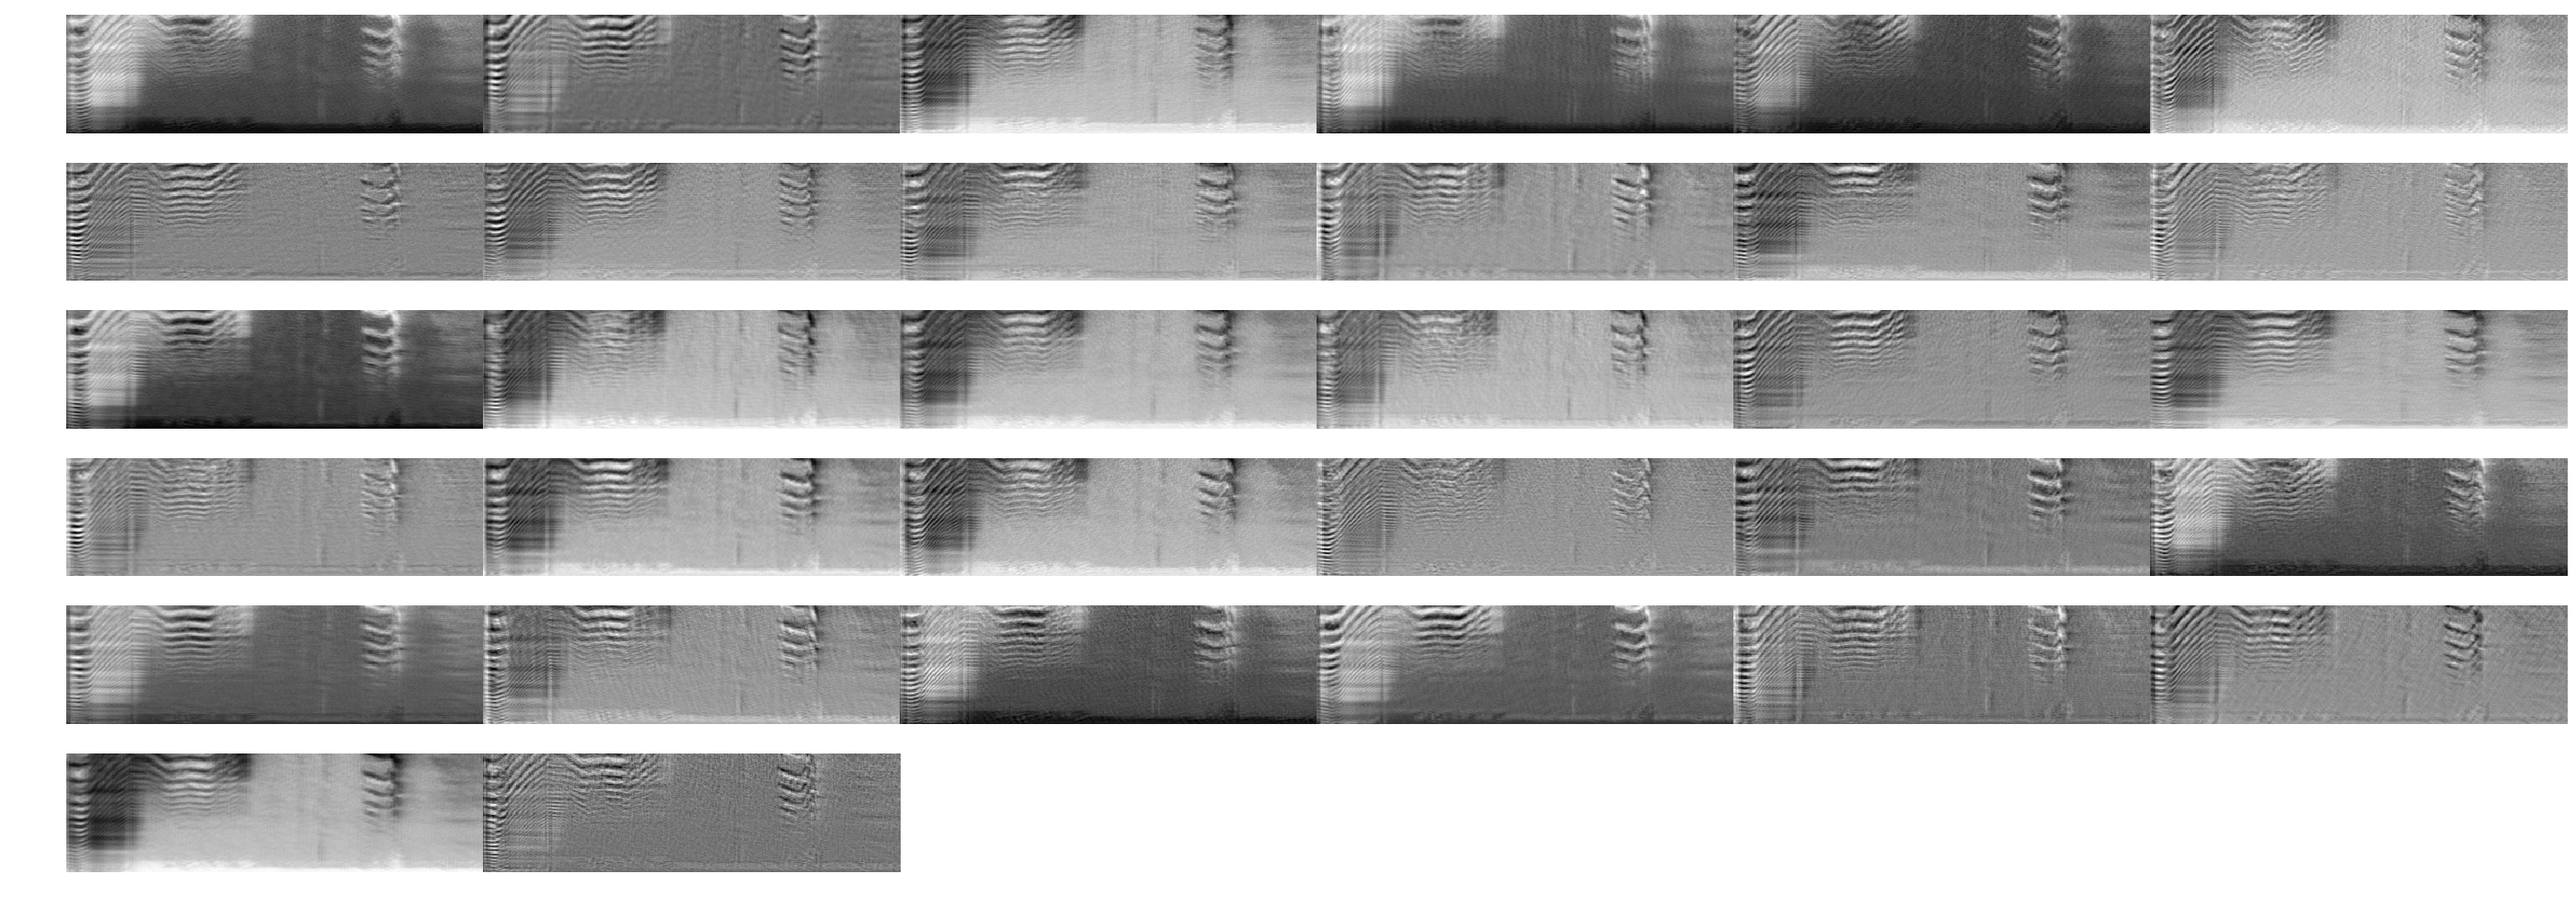

In [319]:
conv1_X = X.detach().numpy()[0]
num_filter = conv1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(conv1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


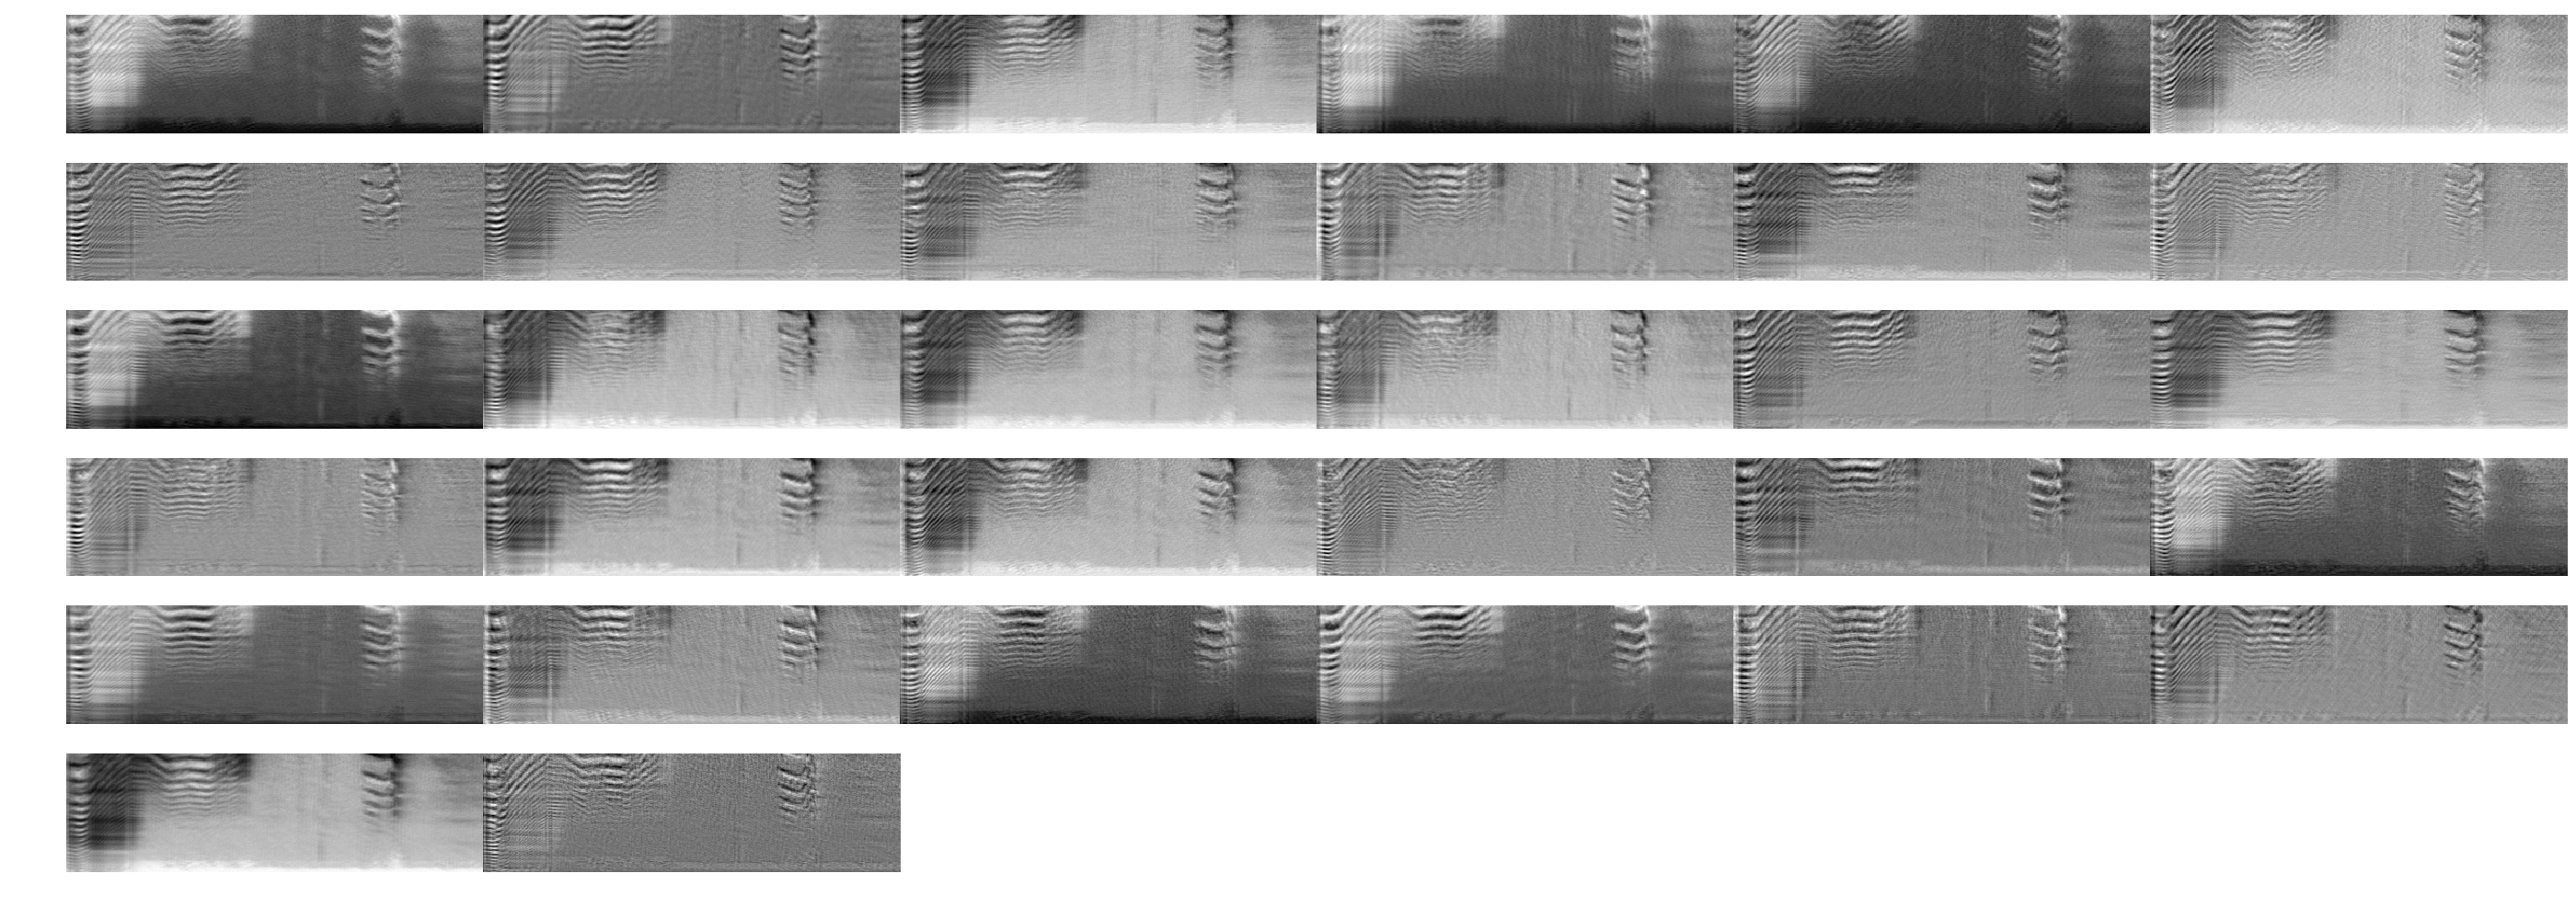

In [320]:
# norm1
norm1 = nn.Sequential(*list(model.children()))[2]
X = norm1(X)
norm1_X = X.detach().numpy()[0]
num_filter = norm1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(norm1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


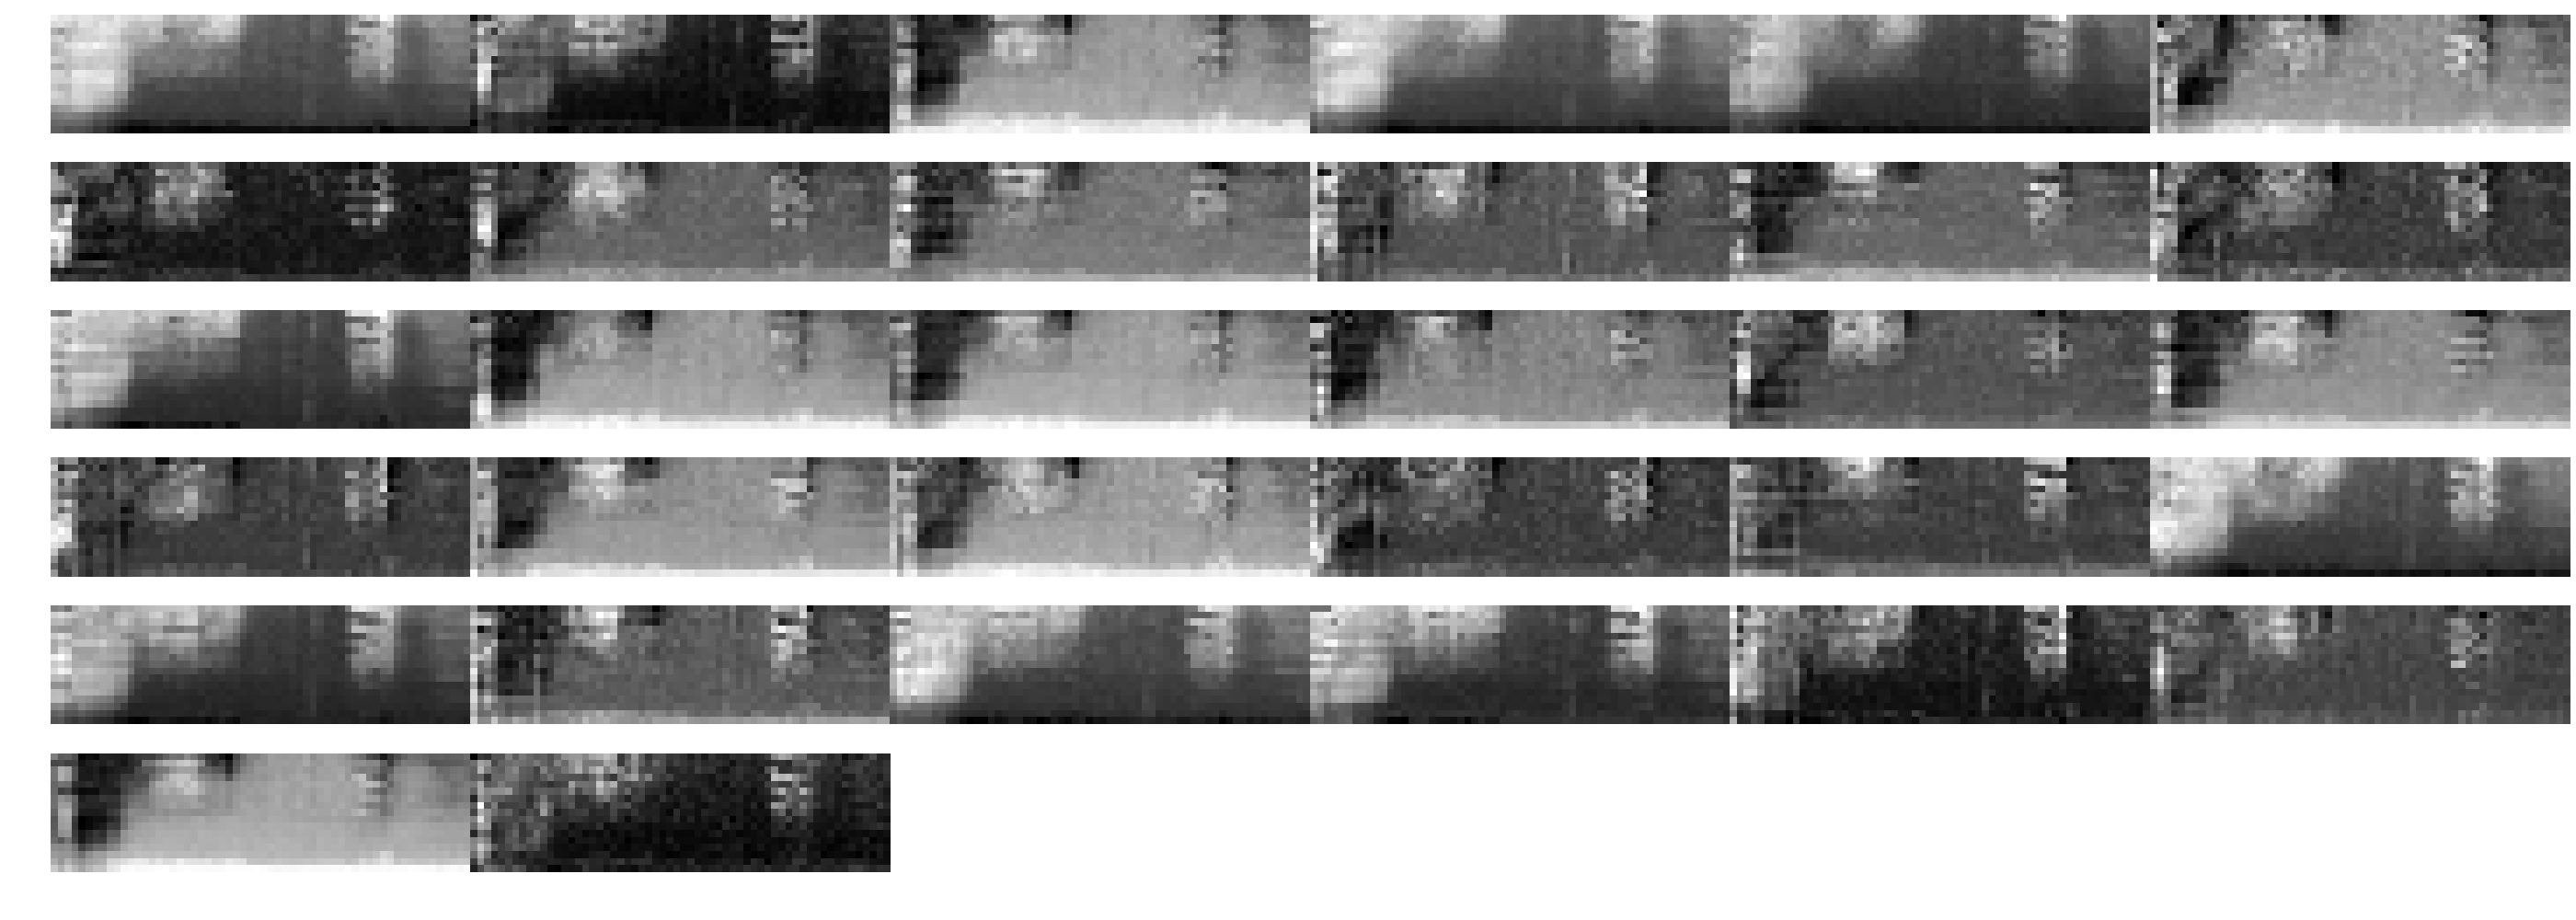

In [321]:
# pool1
pool1 = nn.Sequential(*list(model.children()))[3]
X = pool1(X)
pool1_X = X.detach().numpy()[0]
num_filter = pool1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(pool1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


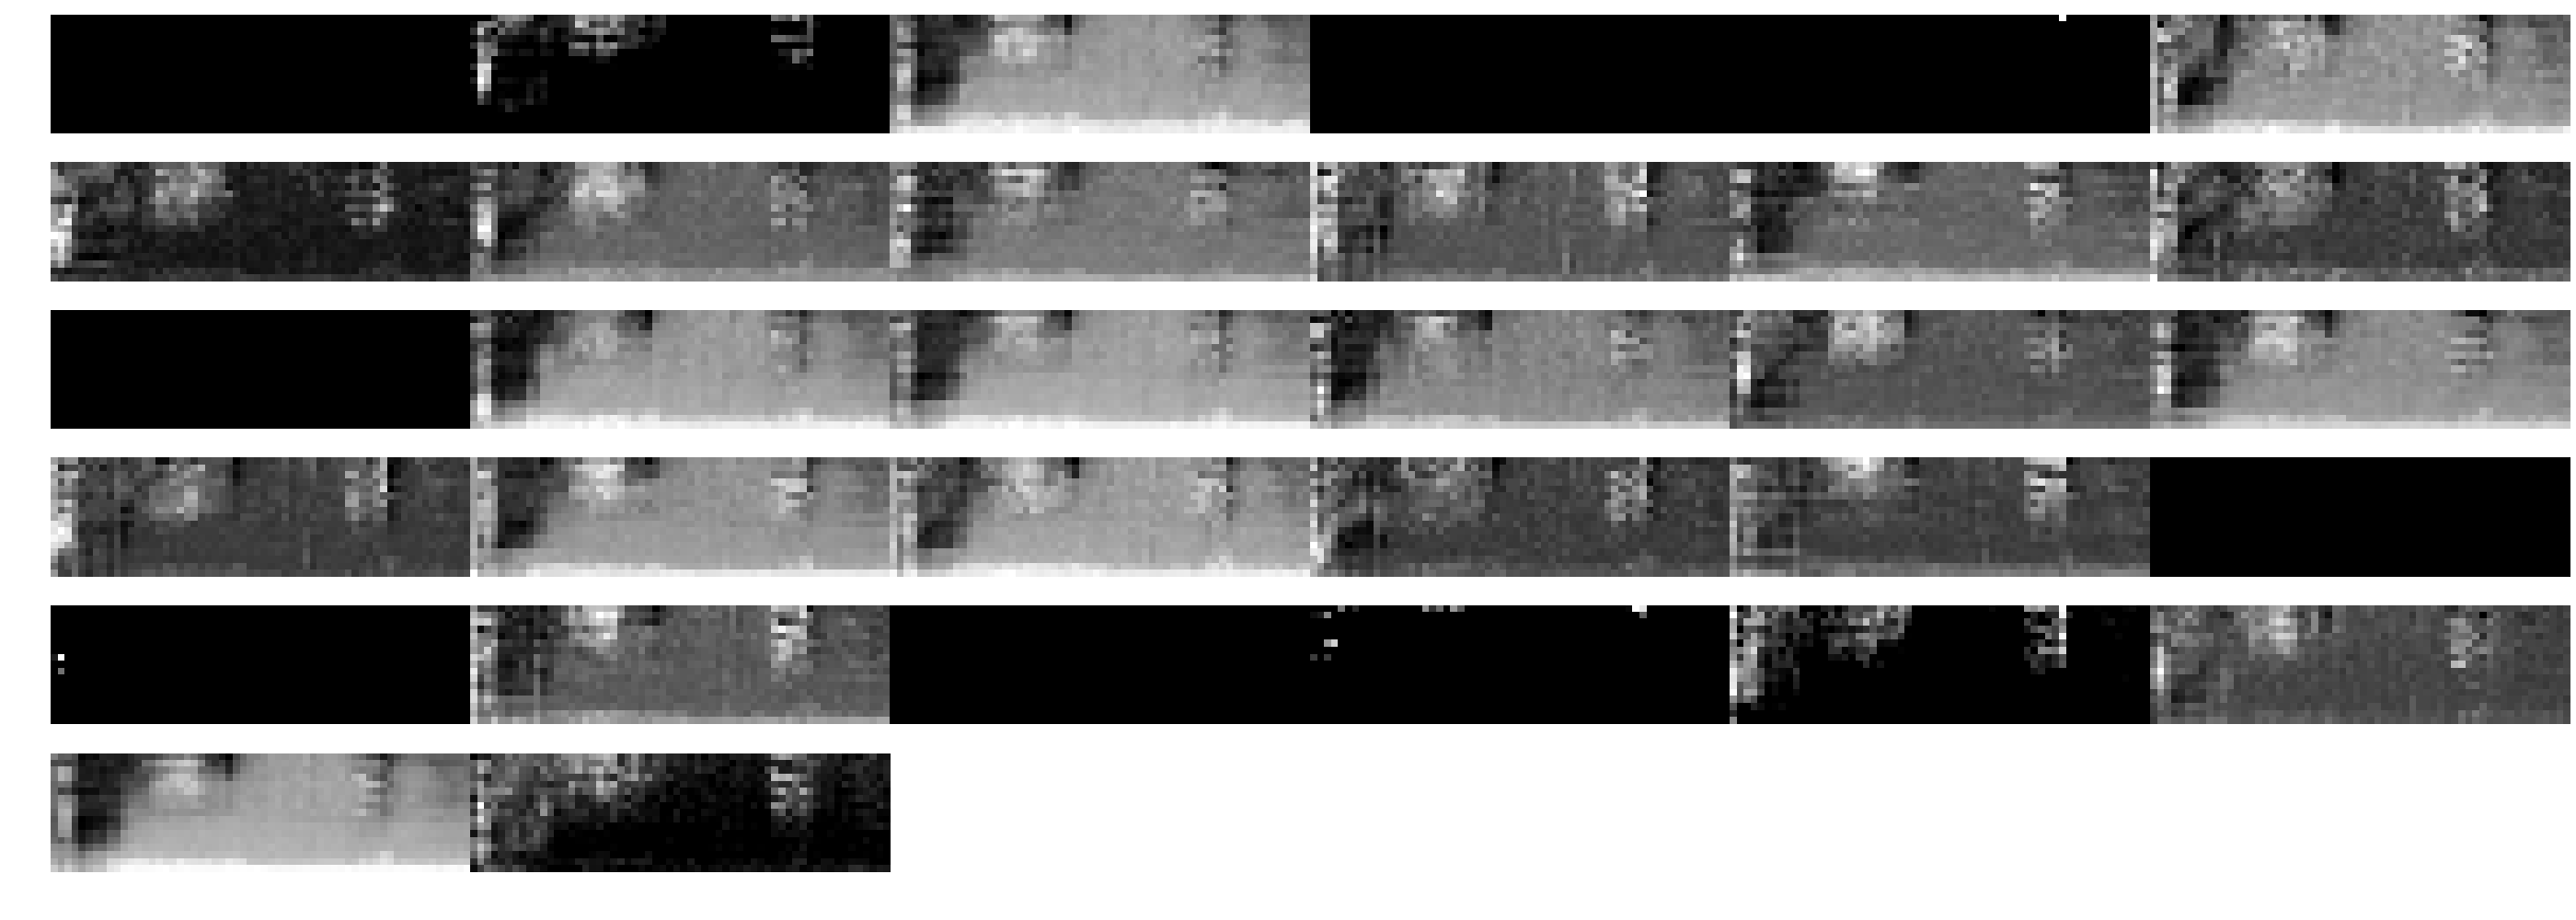

In [322]:
# relu1
X = F.relu(X)
relu1_X = X.detach().numpy()[0]
num_filter = relu1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(relu1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


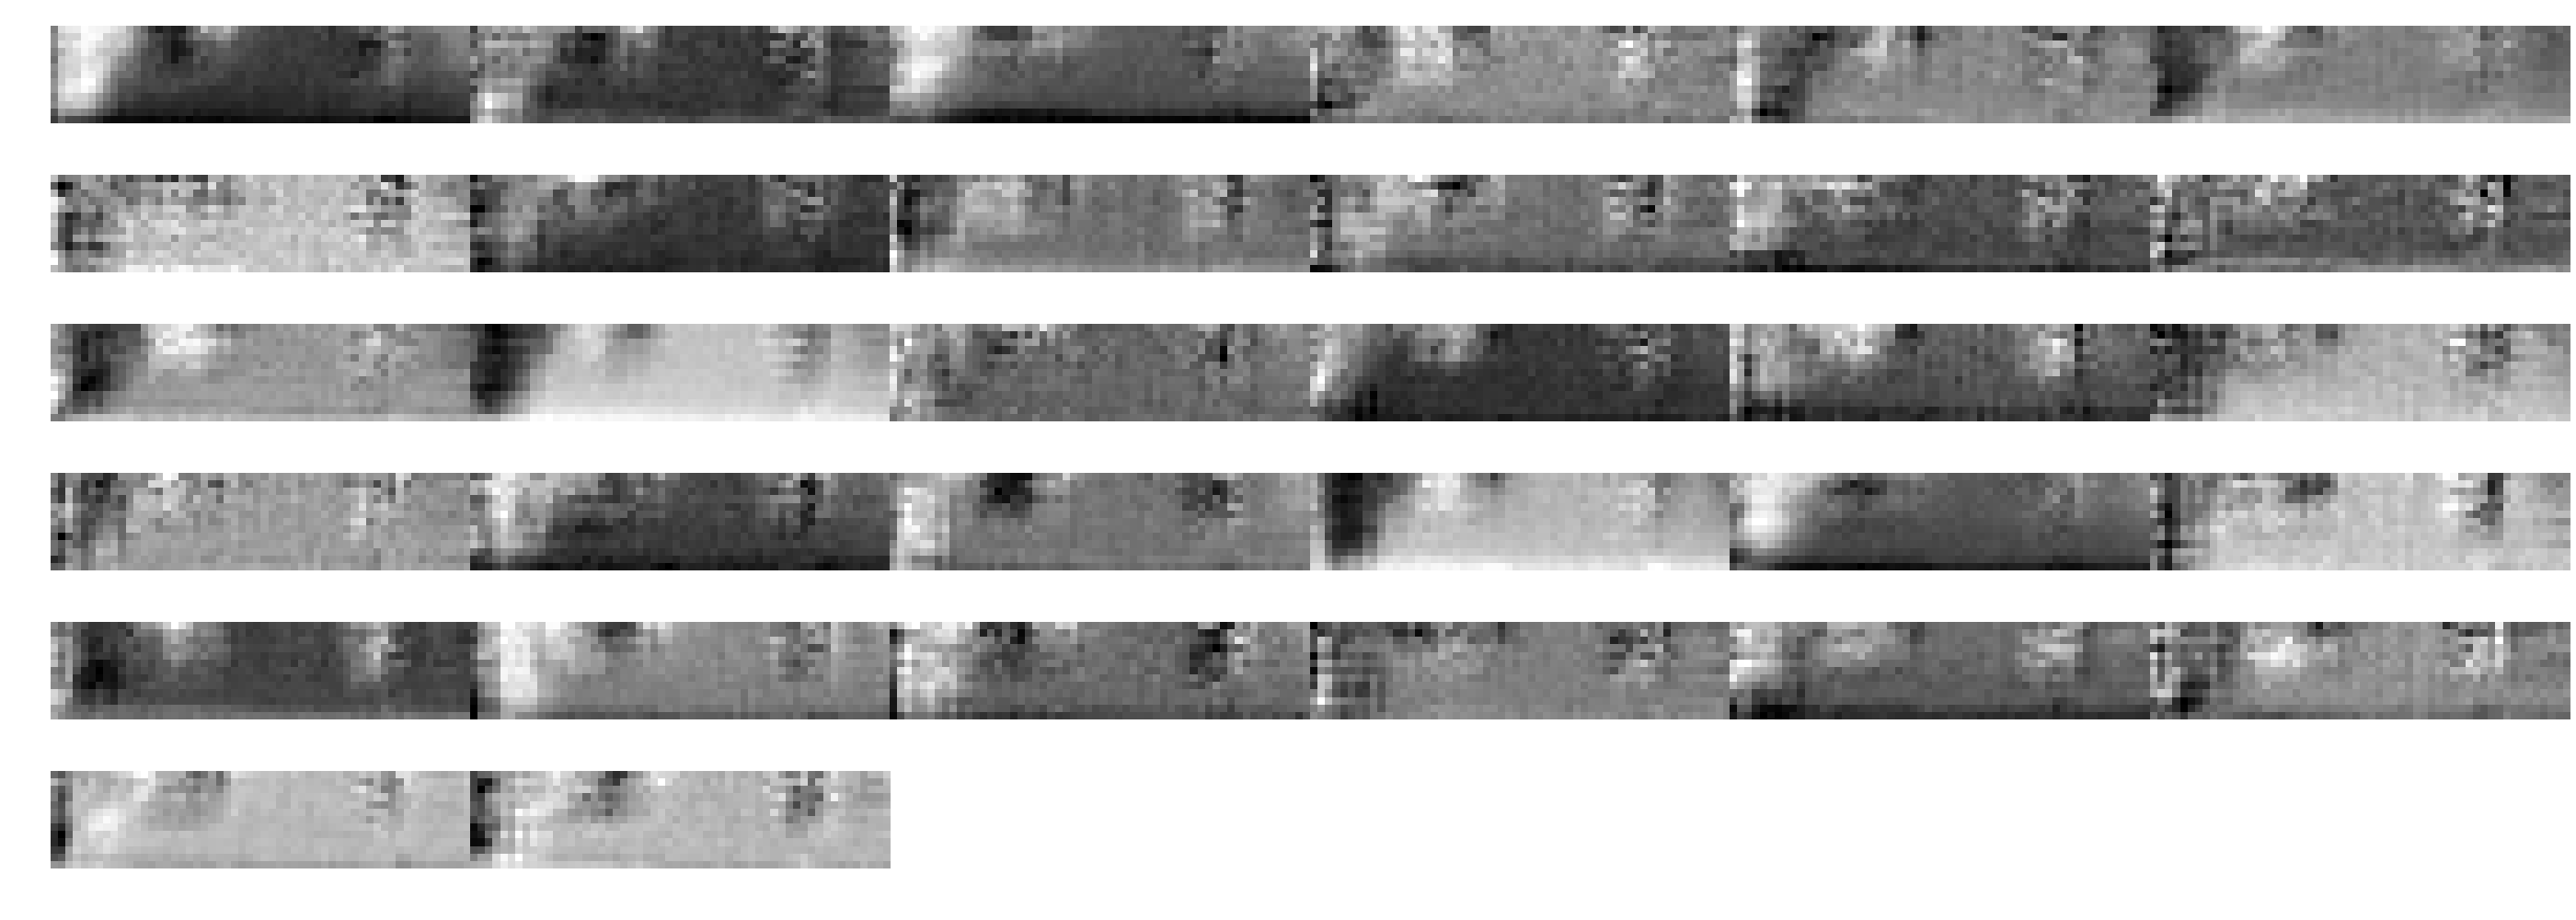

In [323]:
# conv2
conv2 = nn.Sequential(*list(model.children()))[1]
X = conv2(X)
conv2_X = X.detach().numpy()[0]
num_filter = conv2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(conv2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


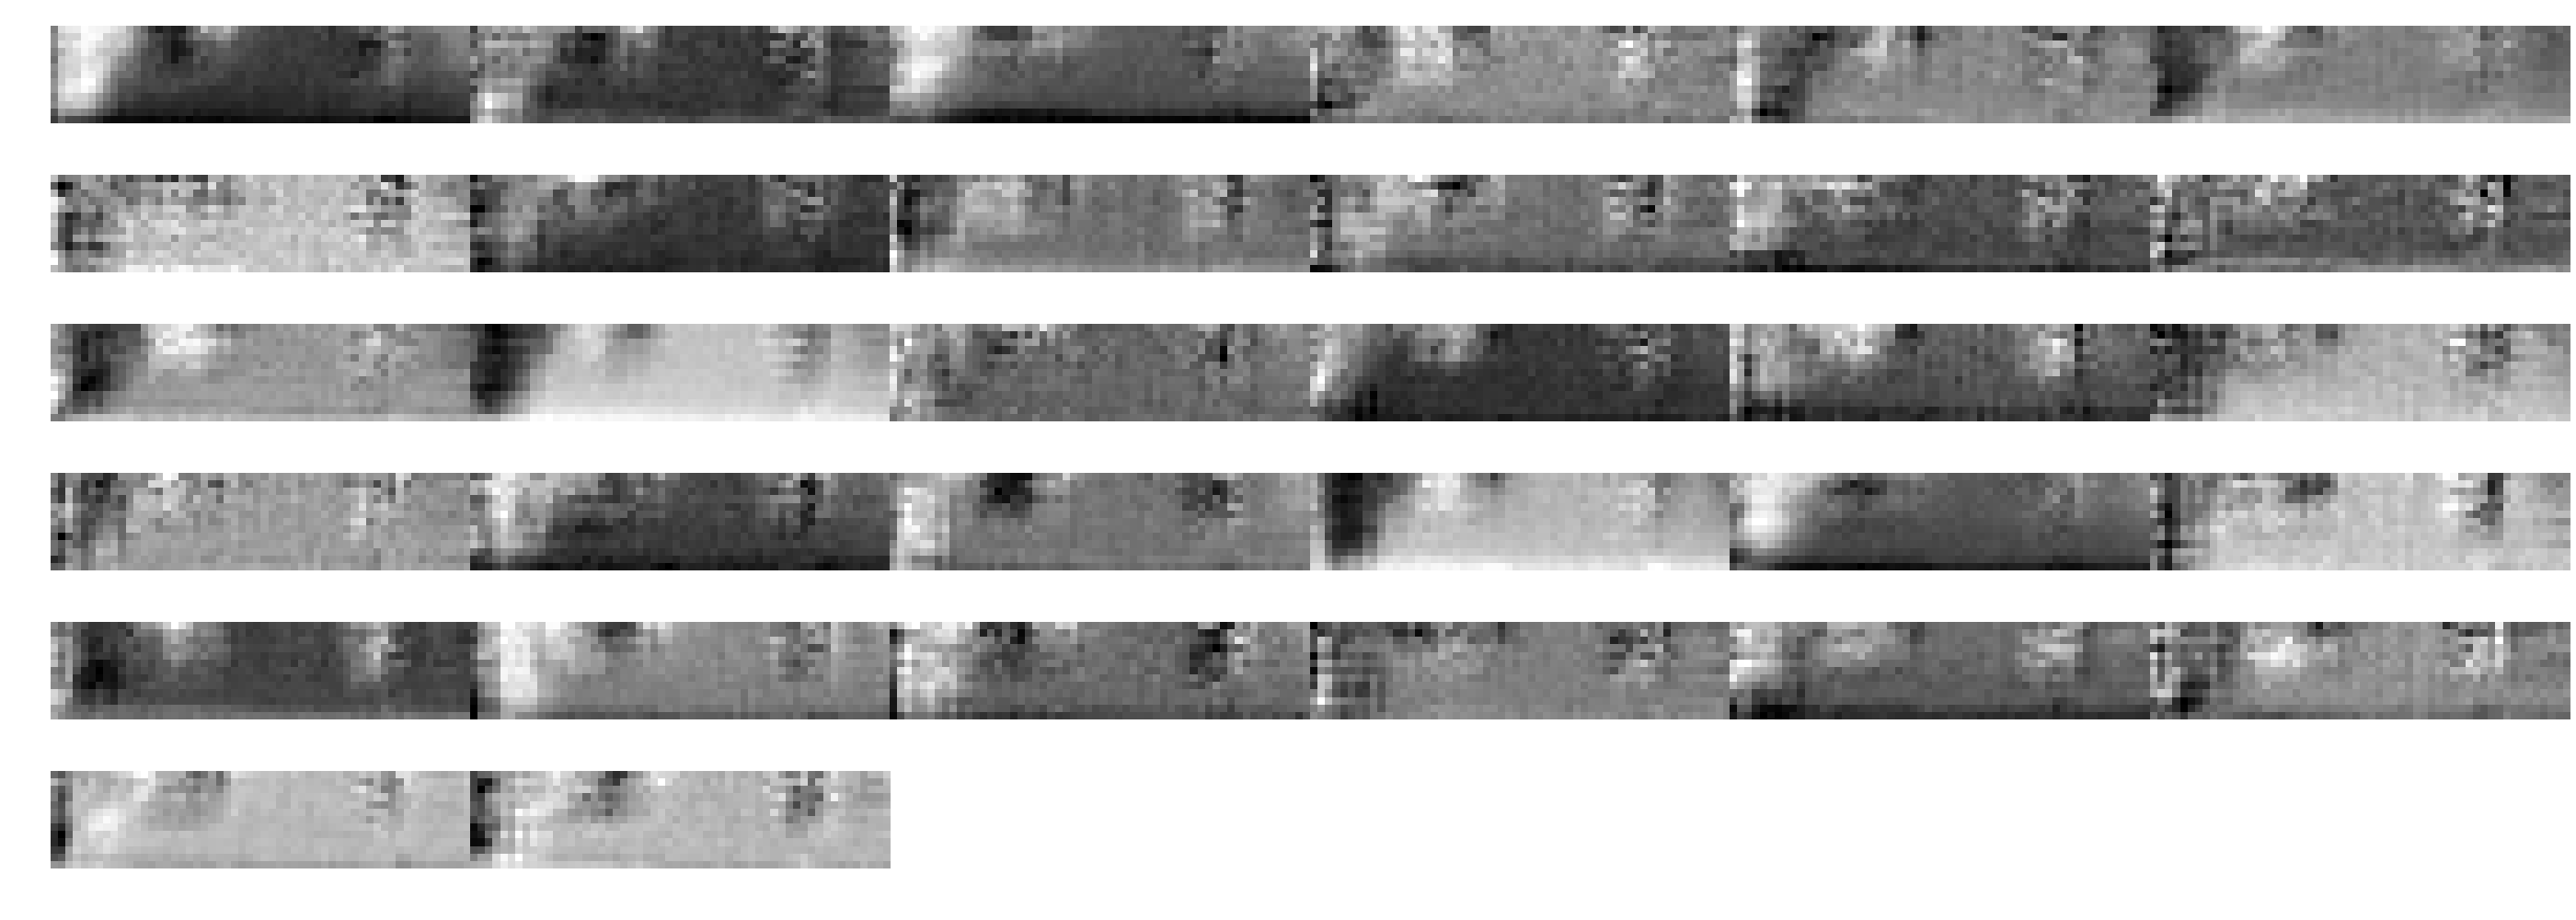

In [324]:
# norm2
# conv2
norm2 = nn.Sequential(*list(model.children()))[2]
X = norm2(X)
norm2_X = X.detach().numpy()[0]
num_filter = norm2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(norm2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

<IPython.core.display.Javascript object>


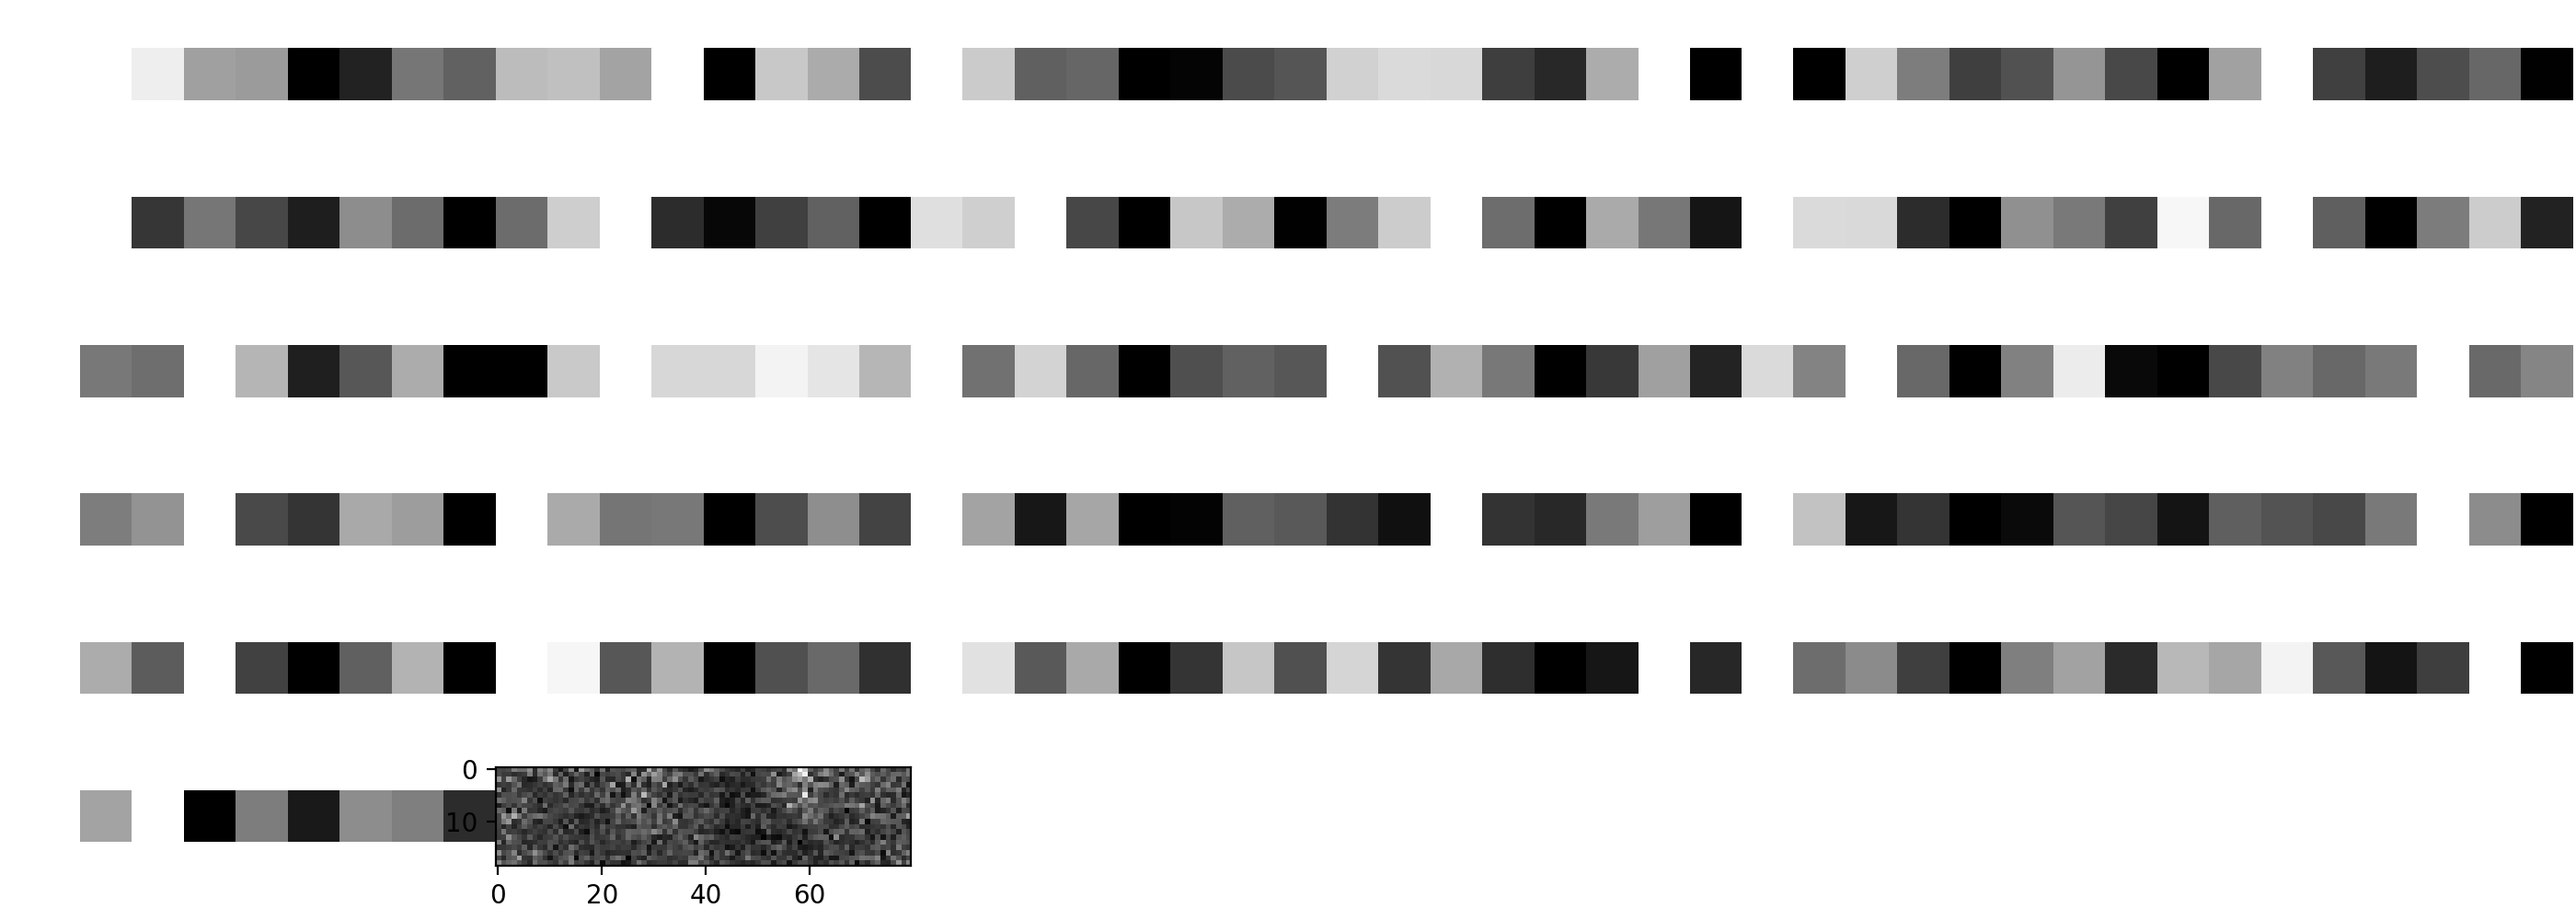

In [325]:
# pool2
pool2 = nn.Sequential(*list(model.children()))[3]
X = pool2(X)
pool2_X = X.detach().numpy()[0]
num_filter = pool2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(pool2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)

## Visualize CNN Filters

<IPython.core.display.Javascript object>


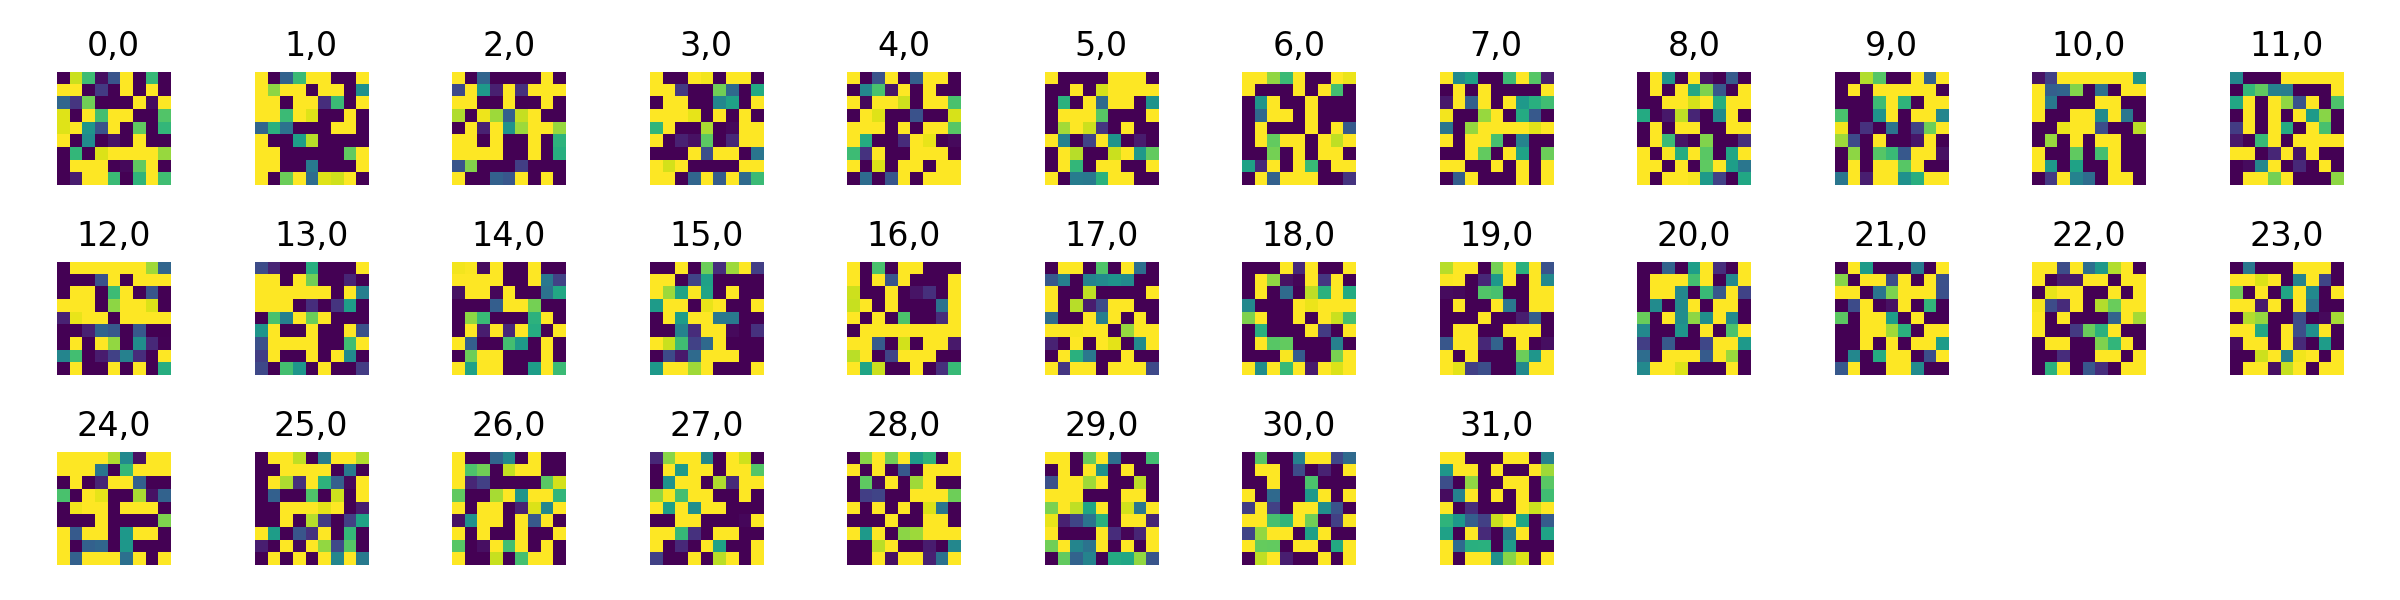

In [6]:
from vis_filters import *
plot_weights(model, 0, single_channel = True)

torch.Size([32, 1, 9, 9])


<IPython.core.display.Javascript object>


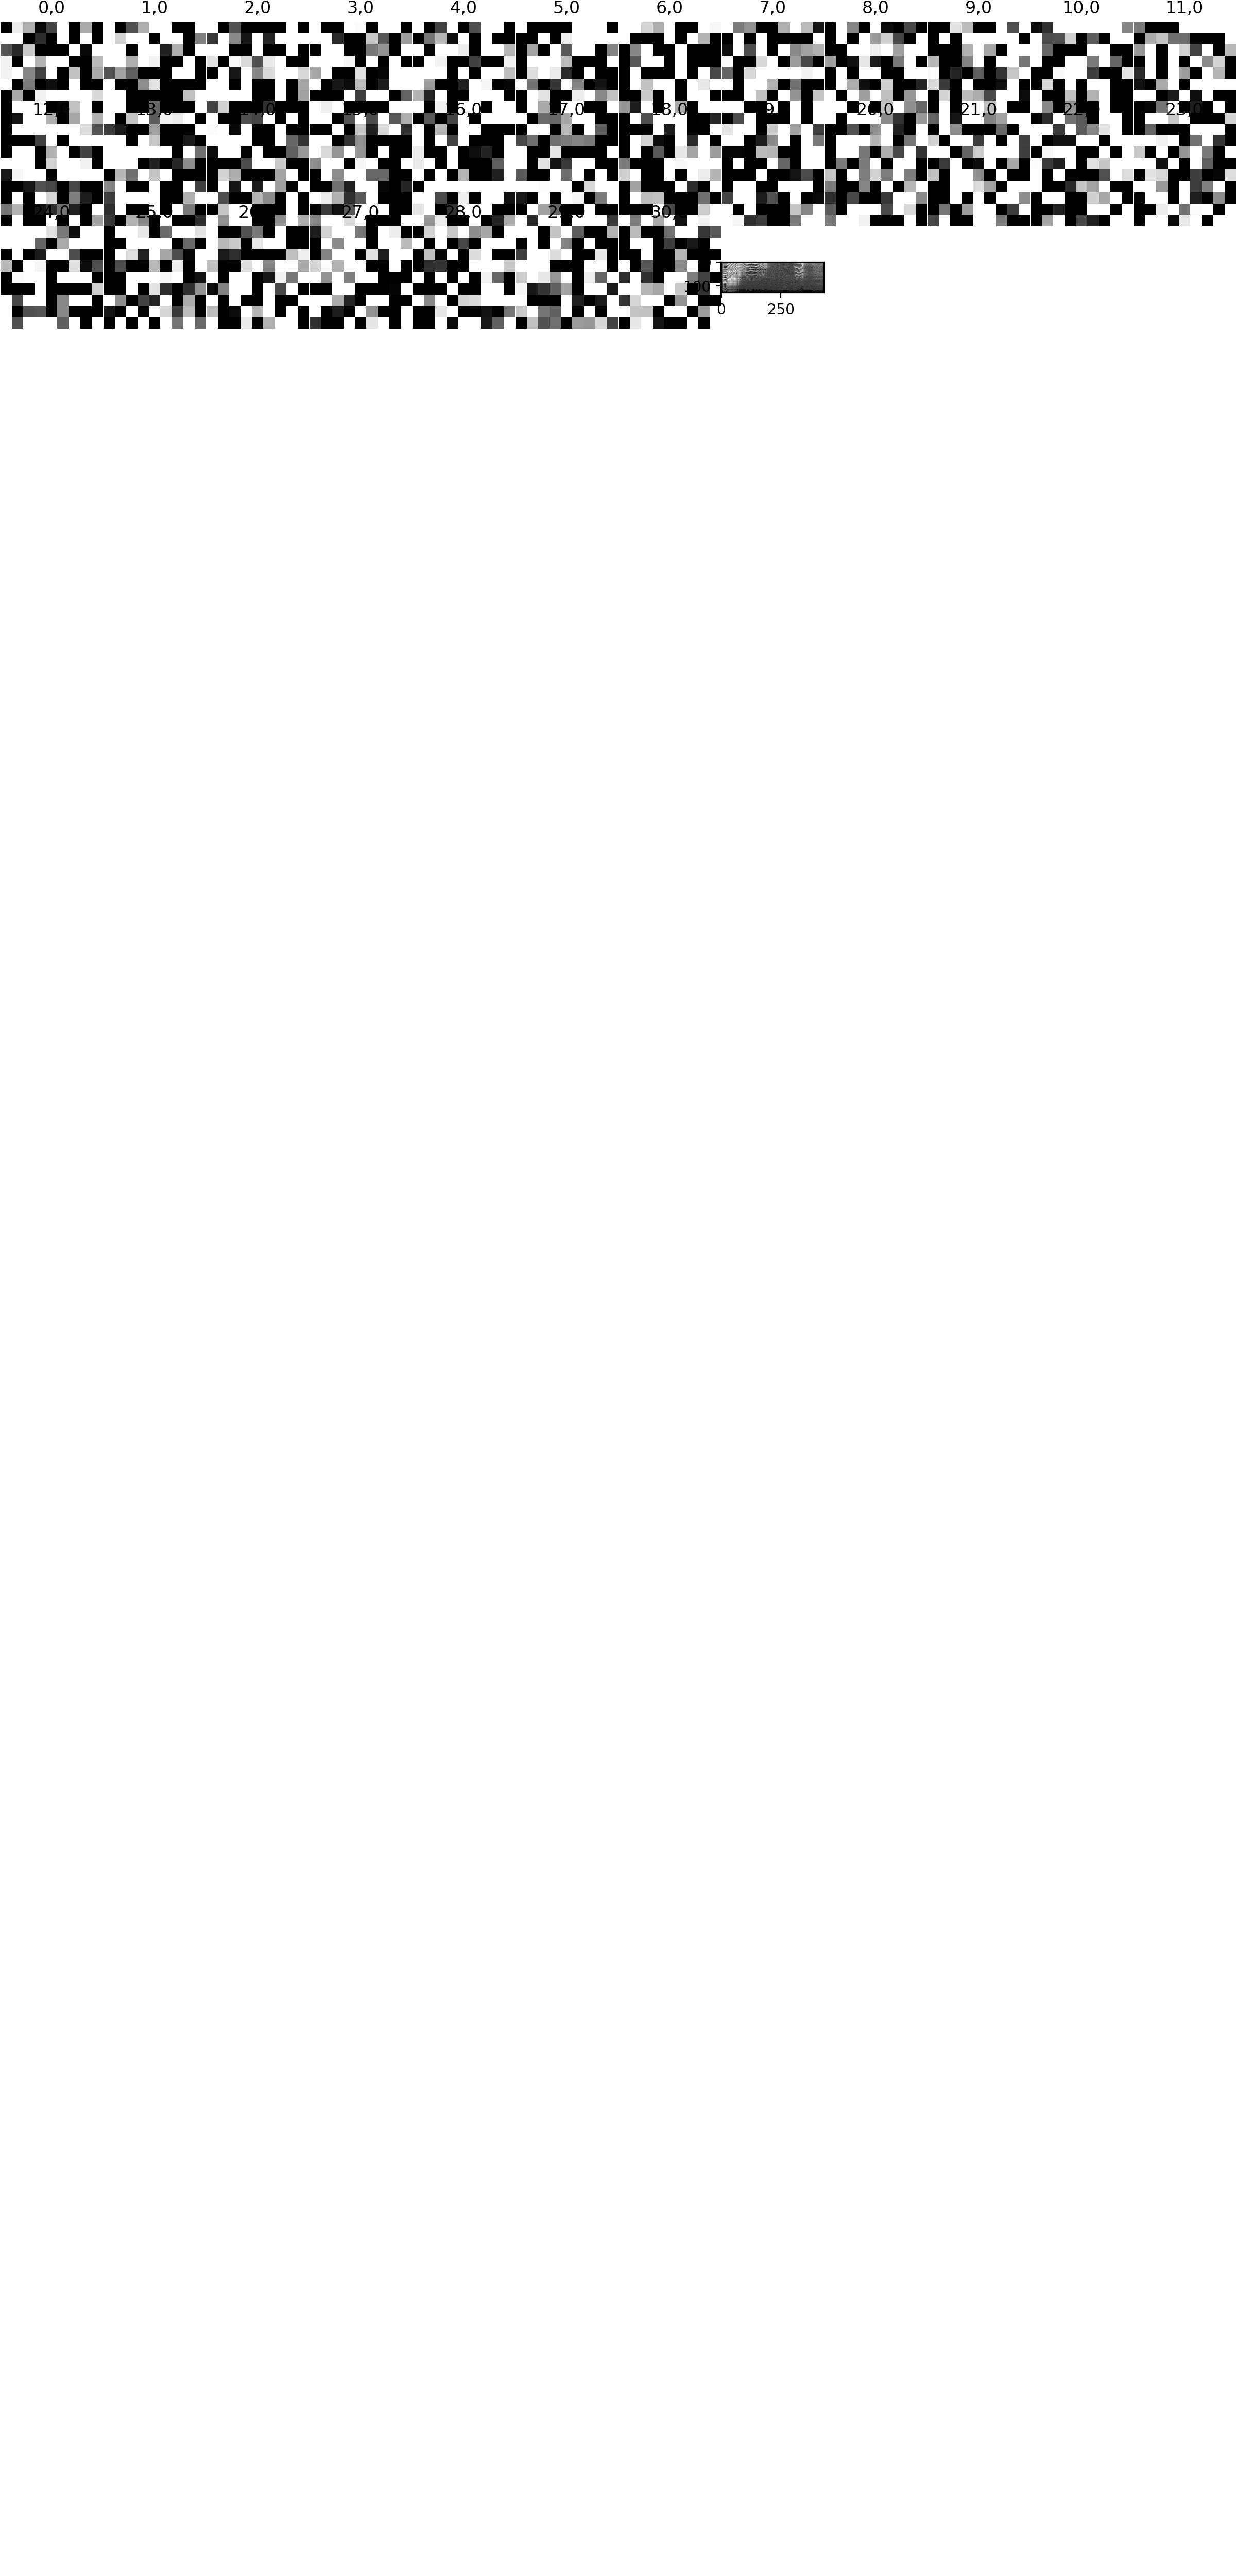

In [309]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    print(t.shape)
    t = t[:, 0, :, :]
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(1):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i,:,:].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
#             print(npimg)
            ax1.imshow(npimg,cmap="gray")
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    
def plot_weights(model, layer_num, single_channel = True, collated = False):
    
    weight_tensor = nn.Sequential(*list(model.children())[:4])[layer_num].weight.data
    
    if single_channel:
        plot_filters_single_channel(weight_tensor)
        
plot_weights(model, 0, single_channel = True)

## Gradient * Image

### 1. Vanilla Gradient

In [26]:
class VanillaBackprop():
    """
        Produces gradients generated with vanilla back propagation from the image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]

        # Register hook to the first layer
        first_layer = weight_tensor = nn.Sequential(*list(model.children())[:4])[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def generate_gradients(self, input_image, target_class):
        model_output = self.model(input_image)
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

In [40]:
def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale
    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)
    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im

In [196]:
def save_gradient_images(gradient, file_name="", grayscale=True):
    """
        Exports the original gradient image
    Args:
        gradient (np arr): Numpy array of the gradient with shape (3, 224, 224)
        file_name (str): File name to be exported
    """
    # Normalize
    gradient = gradient - gradient.min()
    gradient /= gradient.max()
    path_to_file = os.path.join('../output/', file_name + '.jpg')
    gradient = gradient[0,:,:]
    if grayscale:
        plt.imshow(gradient, cmap='gray')
    else:
        plt.imshow(gradient)
    plt.savefig(path_to_file)

    return gradient

/Users/xixi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


<IPython.core.display.Javascript object>


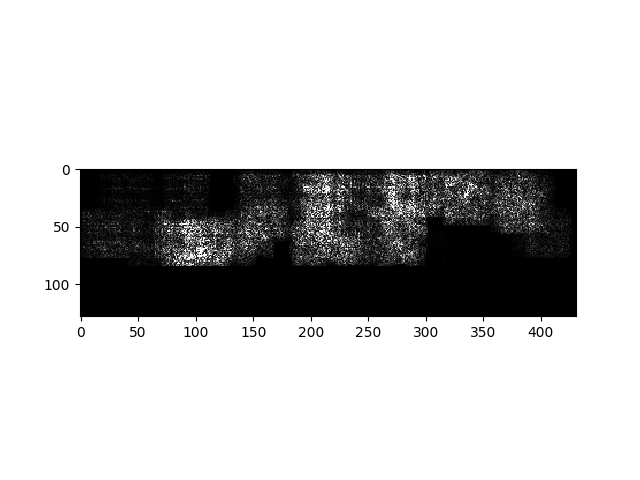

In [232]:
def get_example_params():
    
    example_list = ['../input_images/1-51805-C-33.npy',
                    '../input_images/1-51805-D-33.npy',
                    '../input_images/5-161270-B-33.npy']

    for filepath in example_list:
        prep_img = np.load(filepath)
        target_class = 33
    
    return (prep_img, target_class)


output_dir = "../output/"
prep_img, target_class =get_example_params()
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = torch.from_numpy(prep_img)
prep_img = Variable(prep_img, requires_grad=True)
VBP = VanillaBackprop(model)
vanilla_grads = VBP.generate_gradients(prep_img, target_class)
grad_times_image = vanilla_grads[0] * prep_img.detach().numpy()[0]
grayscale_vanilla_grads = convert_to_grayscale(grad_times_image)

im = save_gradient_images(grayscale_vanilla_grads,'Vanilla_grad_times_image_gray_color', False)

### 2. Guided Gradient

In [193]:
class GuidedBackprop():
    """
       Produces gradients generated with guided back propagation from the given image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        self.forward_relu_outputs = []
        # Put model in evaluation mode
        self.model.eval()
        self.update_relus()
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]
        # Register hook to the first layer
        first_layer = weight_tensor = nn.Sequential(*list(model.children())[:4])[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
#         first_layer.register_backward_hook(hook_function)
    
#         first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def update_relus(self):

        def relu_backward_hook_function(module, grad_in, grad_out):
   
            corresponding_forward_output = self.forward_relu_outputs[-1]
            corresponding_forward_output = corresponding_forward_output[0]
            corresponding_forward_output[corresponding_forward_output > 0] = 1
            modified_grad_out = corresponding_forward_output * torch.clamp(grad_in[0], min=0.0)
            del self.forward_relu_outputs[-1]  # Remove last forward output
            return (modified_grad_out,)

        def relu_forward_hook_function(module, ten_in, ten_out):

            self.forward_relu_outputs.append(ten_in)

        # Loop through layers, hook up ReLUs
#         first_layer = weight_tensor = nn.Sequential(*list(model.children())[:4])[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
#         first_layer.register_backward_hook(hook_function)
        for module in nn.Sequential(*list(model.children())):
#             print(module)
            if isinstance(module, nn.MaxPool2d):
                module.register_forward_hook(relu_forward_hook_function)
                module.register_backward_hook(relu_backward_hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward pass
        model_output = self.model(input_image)
        # Zero gradients
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

In [199]:
target_example = 33  # Snake
# (original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
#     get_example_params(target_example)
prep_img, target_class =get_example_params()
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = torch.from_numpy(prep_img)
prep_img = Variable(prep_img, requires_grad=True)
# Guided backprop
GBP = GuidedBackprop(model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
guided_grads = convert_to_grayscale(guided_grads)
# Save colored gradients
save_gradient_images(guided_grads, '_Guided_BP_color', False)
# # Convert to grayscale
# grayscale_guided_grads = convert_to_grayscale(guided_grads)
# # Save grayscale gradients
# save_gradient_images(grayscale_guided_grads, file_name_to_export + '_Guided_BP_gray')
# # Positive and negative saliency maps
# pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
# save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
# save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
# print('Guided backprop completed')

/Users/xixi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [2]:
class CNNLayerVisualization():
    """
        Produces an image that minimizes the loss of a convolution
        operation for a specific layer and filter
    """
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0
        # Create the folder to export images if not exists
        if not os.path.exists('../generated'):
            os.makedirs('../generated')

    def hook_layer(self):
        def hook_function(module, grad_in, grad_out):
            # Gets the conv output of the selected filter (from selected layer)
            self.conv_output = grad_out[0, self.selected_filter]
        # Hook the selected layer
        _ = nn.Sequential(*list(self.model.children())[:1])[0]
        _.register_forward_hook(hook_function)
        # self.model[self.selected_layer].register_forward_hook(hook_function)

    def visualise_layer_with_hooks(self):
        # Hook the selected layer
        self.hook_layer()
        # Generate a random image
        random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 1)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        for i in range(1, 31):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            for index, layer in enumerate(self.model.children()):
                # Forward pass layer by layer
                # x is not used after this point because it is only needed to trigger
                # the forward hook function
                x = layer(x)
                # Only need to forward until the selected layer is reached
                if index == self.selected_layer:
                    # (forward hook function triggered)
                    break
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            # Recreate image
            self.created_image = recreate_image(processed_image)
            # Save image
            if i % 5 == 0:
                im_path = '../generated/layer_vis_l' + str(self.selected_layer) + \
                    '_f' + str(self.selected_filter) + '_iter' + str(i) + '.jpg'
                im = self.created_image[:,:,0]
#                 im = plt.imshow(self.created_image[:,:,0], cmap='gray')
                plt.imshow(im, cmap='gray', vmin=0, vmax=255)
#                 plt.savefig("./d{}.png".format(i))
#                 self.created_image.plot()
#                 save_image(self.created_image, im_path)

    def visualise_layer_without_hooks(self):
        # Process image and return variable
        # Generate a random image
        random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 3)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        for i in range(1, 31):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                x = layer(x)
                if index == self.selected_layer:
                    # Only need to forward until the selected layer is reached
                    # Now, x is the output of the selected layer
                    break
            # Here, we get the specific filter from the output of the convolution operation
            # x is a tensor of shape 1x512x28x28.(For layer 17)
            # So there are 512 unique filter outputs
            # Following line selects a filter from 512 filters so self.conv_output will become
            # a tensor of shape 28x28
            self.conv_output = x[0, self.selected_filter]
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            # Recreate image
            self.created_image = recreate_image(processed_image)
            # Save image
            if i % 5 == 0:
                im_path = '../generated/layer_vis_l' + str(self.selected_layer) + \
                    '_f' + str(self.selected_filter) + '_iter' + str(i) + '.jpg'
                save_image(self.created_image, im_path)


Iteration: 1 Loss: 0.39
Iteration: 2 Loss: 0.35
Iteration: 3 Loss: 0.31
Iteration: 4 Loss: 0.27
Iteration: 5 Loss: 0.23


<IPython.core.display.Javascript object>


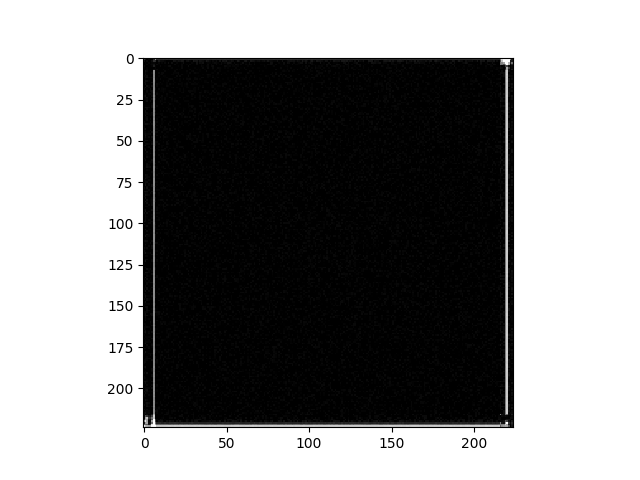

Iteration: 6 Loss: 0.19
Iteration: 7 Loss: 0.15
Iteration: 8 Loss: 0.11
Iteration: 9 Loss: 0.07
Iteration: 10 Loss: 0.03
Iteration: 11 Loss: -0.01
Iteration: 12 Loss: -0.05
Iteration: 13 Loss: -0.09
Iteration: 14 Loss: -0.12
Iteration: 15 Loss: -0.16
Iteration: 16 Loss: -0.20
Iteration: 17 Loss: -0.24
Iteration: 18 Loss: -0.28
Iteration: 19 Loss: -0.32
Iteration: 20 Loss: -0.35
Iteration: 21 Loss: -0.39
Iteration: 22 Loss: -0.43
Iteration: 23 Loss: -0.47
Iteration: 24 Loss: -0.50
Iteration: 25 Loss: -0.54
Iteration: 26 Loss: -0.58
Iteration: 27 Loss: -0.62
Iteration: 28 Loss: -0.65
Iteration: 29 Loss: -0.69
Iteration: 30 Loss: -0.72


In [3]:

cnn_layer = 1
filter_pos = 5
# Fully connected layer is not needed
pretrained_model = torch.load("../CNN_Non_Hierarchical.pt")
# pretrained_model = models.vgg16(pretrained=True).features
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

# Layer visualization with pytorch hooks
layer_vis.visualise_layer_with_hooks()

# Layer visualization without pytorch hooks
# layer_vis.visualise_layer_without_hooks()


## t-sne

In [364]:
import os
from torch.utils.data import Dataset, DataLoader

sel_cls = [5, 33, 34, 6, 10]
# rootpath = "//Users//xixi//Documents/gatech/8803DDL/proj/deep-audio-master/src/ESC-50/data2"
# t = [x[0] for x in os.walk(rootpath)]
# t
class visset(Dataset):
    def __init__(self):
        
        rootpath = "//Users//xixi//Documents/gatech/8803DDL/proj/deep-audio-master/src/ESC-50/data2"
        self.data_list = []
        self.label_list = []
        for dir in os.walk(rootpath):
            if dir[0].split("/")[-1][:5]=="class" and int(dir[0].split("/")[-1][5:]) in sel_cls:
                cls = int(dir[0].split("/")[-1][5:])
                for root, _dir,files in os.walk(dir[0]):
                    for file in files:
                        if file.find('.npy')!= -1:
#                             print(root, dir[0], file)
                            self.data_list.append(os.path.join(root, file))
#                             print(os.path.join(root, file))
                            self.label_list.append(cls)
        print(len(self.data_list), len(self.label_list))
            
#         for root, dir, files in os.walk(rootpath):
#             print(root,dir)
#             for file in files:
#                 if file.find('.npy')!= -1:
#                     self.data_list.append(os.path.join(root, file))
#                     self.label_list.append(int(root.split('/')[-1][5:]))
        print(len(self.data_list), len(self.label_list))
        
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, index):

        path = self.data_list[index]
#         print(path)
#         data = []
#         label = []
        data = np.load(path,allow_pickle = True)
        data = np.expand_dims(data, axis=0)
#         data = np.asarray(Image.open(path))
        label= self.label_list[index] 
#         print(data.shape)
#         data = np.asarray(data)
        label = np.asarray(label)
#         print(data,label)
        return data, label

dataset  = visset()
# data,label = dataset.__getitem__(5)
loader = torch.utils.data.DataLoader(dataset, batch_size=40)
result = []
layers = [(*list(model.children()))]

for i, data in enumerate(loader, 0):
    
    inputs, labels = data
    inputs = inputs.float()
    outputs = layers[0](inputs)
    outputs = layers[2](outputs)
    outputs = F.relu(outputs)
    outputs = layers[3](outputs)
    outputs = layers[1](outputs)
    outputs = layers[2](outputs)
    outputs = F.relu(outputs)
    outputs = layers[3](outputs)
    outputs = outputs.view(outputs.shape[0], -1)
    outputs = layers[4](outputs)
    outputs = F.relu(outputs)
    outputs = layers[5](outputs)
    outputs = layers[6](outputs)
    outputs = F.relu(outputs)
    
    result.append(outputs.detach().cpu().numpy())

result = np.concatenate(result)

200 200
200 200


In [373]:
from sklearn.manifold import TSNE
list_perp = [5, 15, 45, 65, 85]
list_lr = [50,100,200]
# list_perp = [5,]
# list_lr = [50]
list_embedded = []
for prep in list_perp:
    for lr in list_lr:
        embedded = TSNE(perplexity=prep, learning_rate=lr,n_iter=2000).fit_transform(result)
        list_embedded.append(embedded)

list_embedded = np.array(list_embedded)
np.save("./datafile.npy", list_embedded)

In [374]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./datafile.npy")
data.shape

(15, 200, 2)

<IPython.core.display.Javascript object>


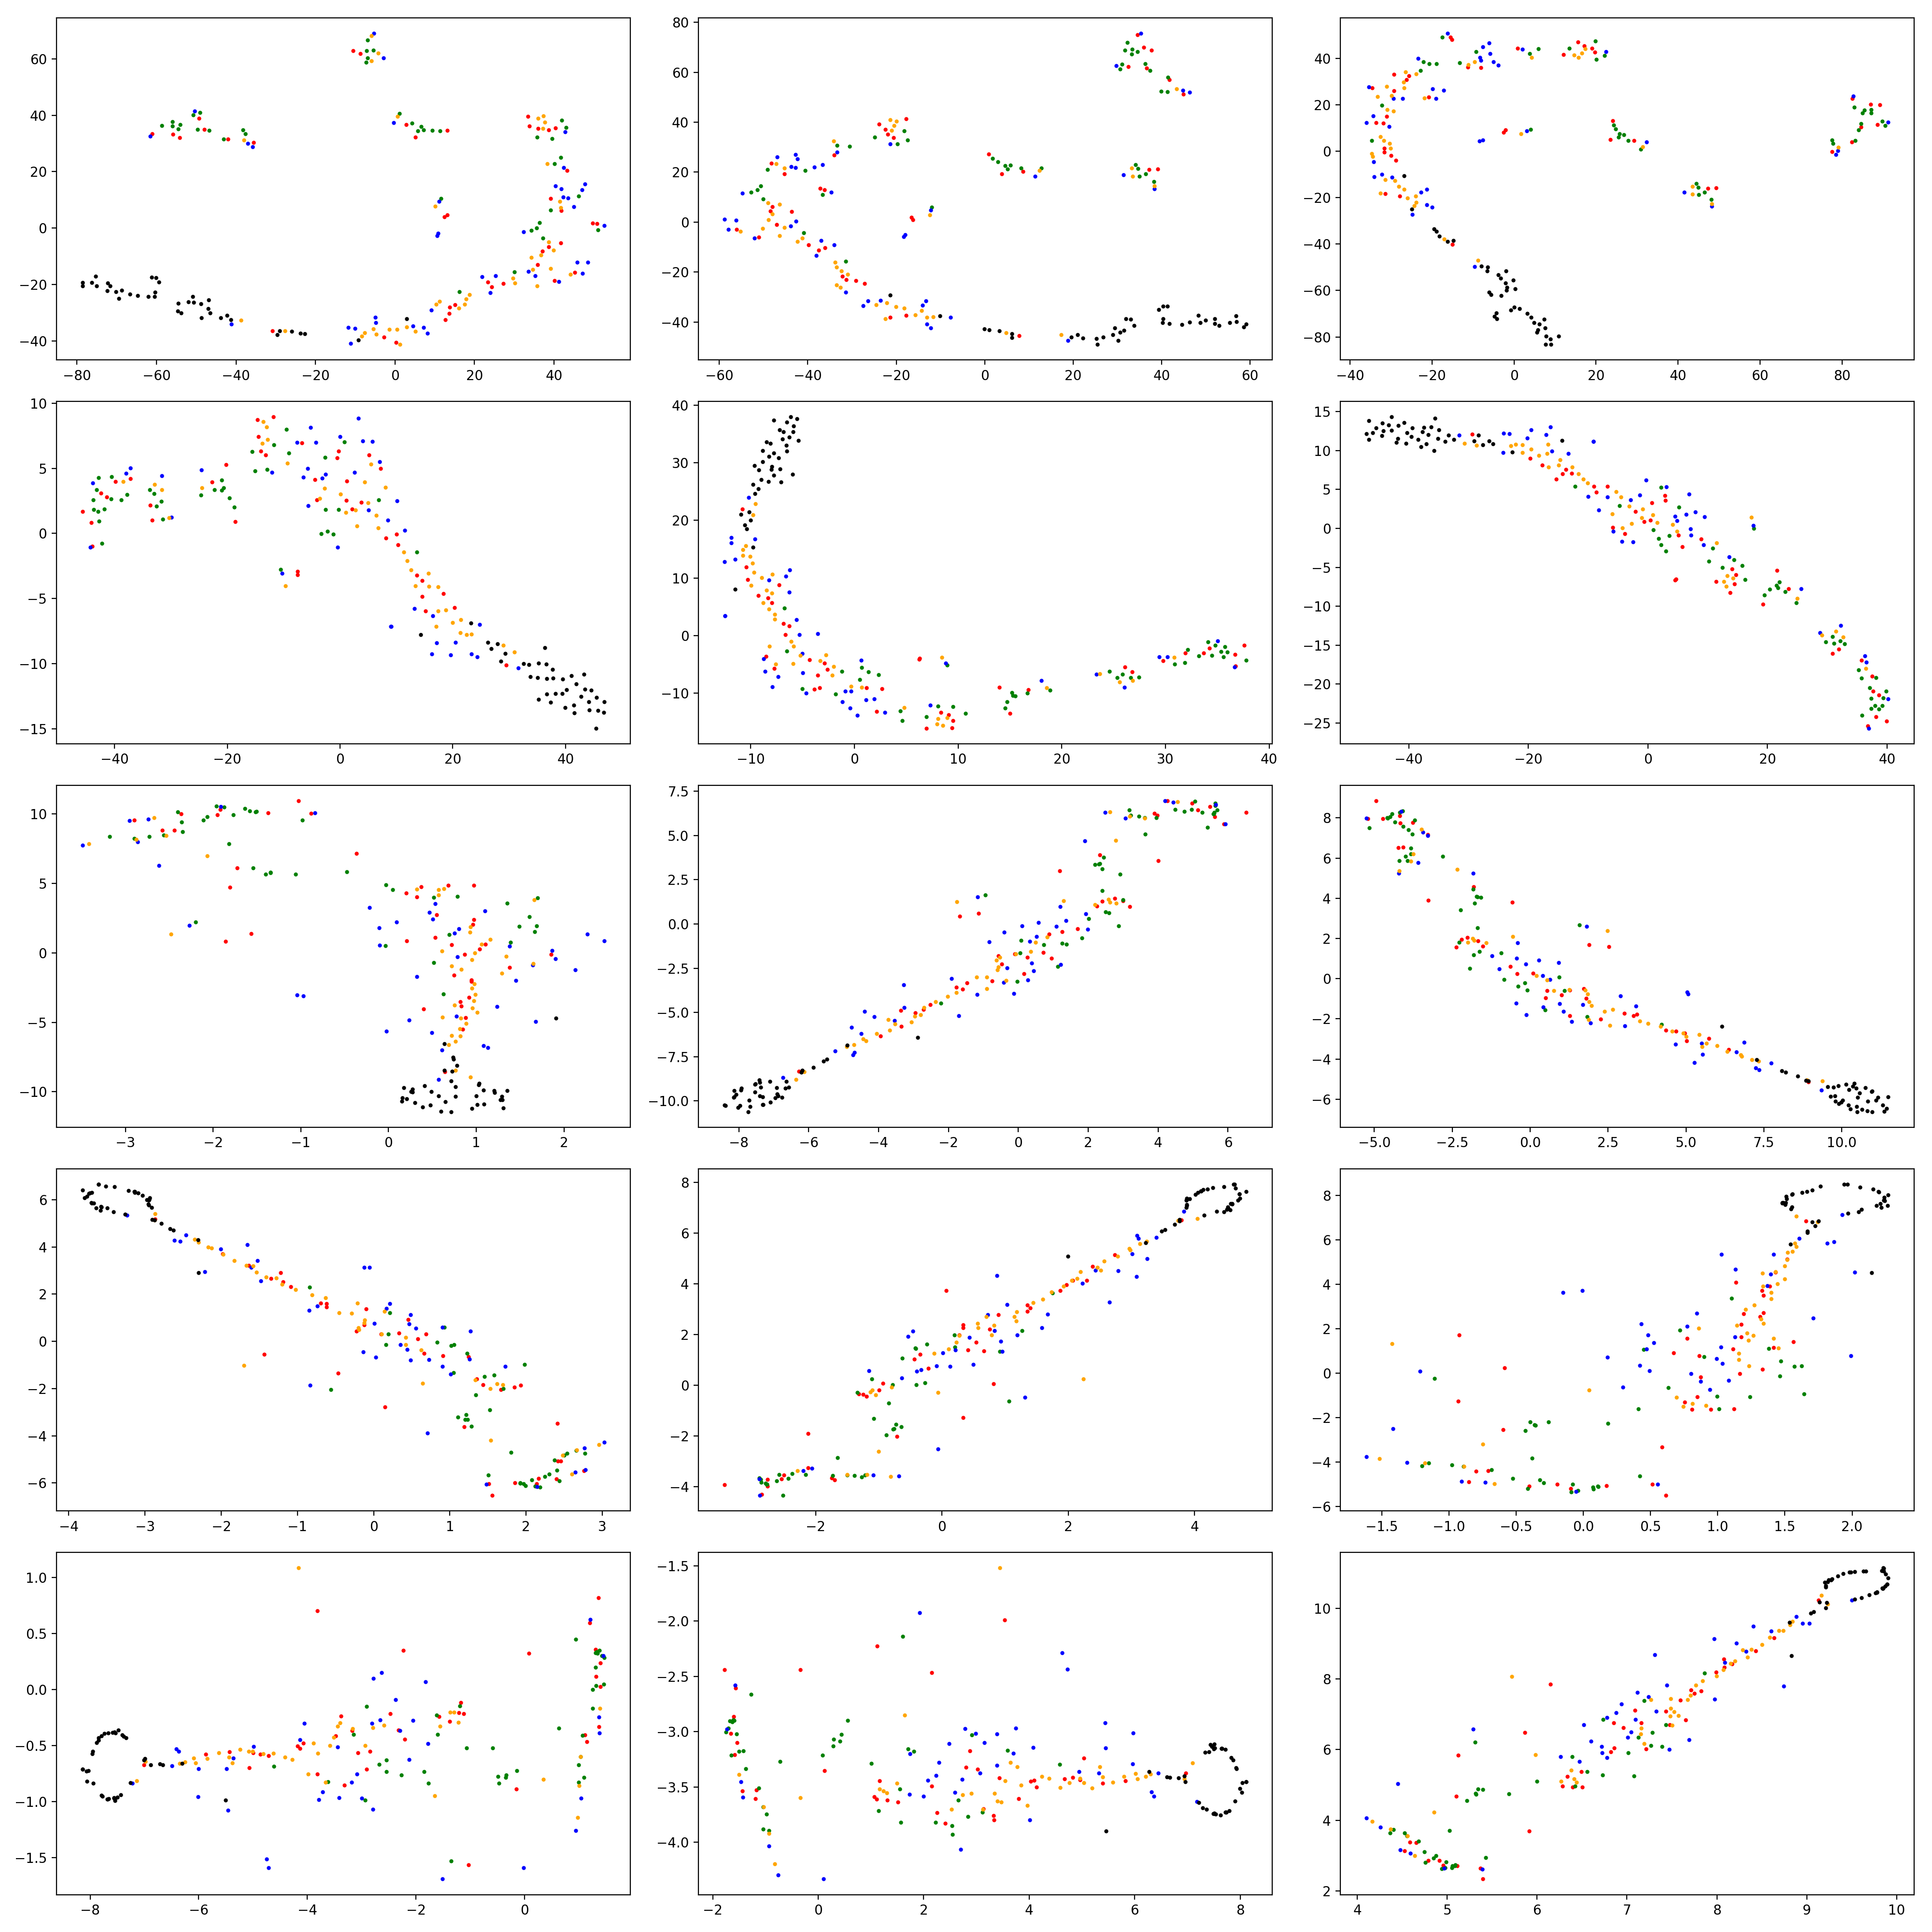

In [375]:
fig = plt.figure(figsize=(20, 20))

num_sample = 40
for num in range(len(data)):
    ax = fig.add_subplot(5,3,num+1)
    colors = []
    for c in ['red', 'green', 'blue', 'orange', 'black']:
        for j in range(40):
            colors.append(c)

    for x, y, co in zip(data[num][:,0], data[num][:,1], colors):
        ax.plot(x, y, c=co, marker="o", markersize=2)
    
plt.tight_layout()
plt.show()

## Occlusion

In [404]:
# Predict probabilities for given test image using trained model
def pred_prob_list(model, test_image):
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = torch.from_numpy(test_image)
    test_image = Variable(test_image, requires_grad=False)
    
#     test_image = preprocess_input(test_image)
    predictions = model(test_image)
#     print(predictions)
    return predictions

In [ ]:
import numpy as np
import cv2
from keras import backend as K


# Normalize the input and clip between (0,1)
def normalize_clip(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    return x


# Normalize and Convert to RGB image
def deprocess_image(x):
    x = normalize_clip(x)
    x *= 255
    if x.shape[2] != 3:
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


# L2 normalization of gradients
def l2_normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)


# Gaussian Blur Regularization
def blur_regularization(img, size=(3, 3)):
    return cv2.blur(img, size)


# L2 decay regularization
def decay_regularization(img, decay=0.8):
    return decay * img


# Clipping pixels with small norm
def clip_weak_pixel_regularization(img, percentile=1):
    clipped = img
    threshold = np.percentile(np.abs(img), percentile)
    clipped[np.where(np.abs(img) < threshold)] = 0
    return clipped


# Save list of images in one figure
def all_imgs_in_one(img_list, img_width, img_height):
    margin = 5
    n = int(len(img_list) ** 0.5)
    width = n * img_width + (n - 1) * margin
    height = n * img_height + (n - 1) * margin
    all_in_one = np.zeros((width, height, 3))

    for i in range(n):
        for j in range(n):
            index = i * n + j
            if index < len(img_list):
                img = img_list[i * n + j]
                all_in_one[(img_width + margin) * i: (img_width + margin) * i + img_width,
                (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img
    return all_in_one


def save_occs(occ_img_list, img_width, img_height, img_path):
    occ_img = all_imgs_in_one(occ_img_list, img_width, img_height)
    cv2.imwrite('occ_exp/occs_' + img_path, occ_img)


def save_filters(filters, img_width, img_height, layer, name):
    stitched_filters = all_imgs_in_one(filters, img_width, img_height)
    cv2.imwrite('cnn_filters/filters_pro_' + layer + '_' + name, stitched_filters)

In [430]:
import argparse
import math
import time
import cv2

import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def get_occ_imgs(img, img_size, occ_size, occ_pixel, occ_stride, classes):
 
    img_path = "../input_images/1-51805-C-33.npy"
    class_index = int(classes)
    # Index of class with highest probability
#     class_index = np.argmax(classes)
#     print('True class index:', class_index)
    image = np.load(img_path)
    output_height = int(math.ceil((img_size[0] - occ_size) / occ_stride + 1))
    output_width = int(math.ceil((img_size[1] - occ_size) / occ_stride + 1))
    print('Total iterations:', output_height, '*', output_width, '=', output_height * output_width)

    # Initialize probability heatmap and occluded images
    temp_img_list = []
    prob_matrix = np.zeros((output_height, output_width))

    start = time.time()

    for h in range(output_height):
        for w in range(output_width):
            # Occluder window:
            h_start = h * occ_stride
            w_start = w * occ_stride
            h_end = min(img_size[0], h_start + occ_size)
            w_end = min(img_size[1], w_start + occ_size)

            # Getting the image copy, applying the occluding window and classifying it:
            occ_image = image.copy()
            occ_image[h_start:h_end, w_start:w_end] = occ_pixel
            predictions = pred_prob_list(model, occ_image.copy())[0]
#             print(predictions)
            prob = predictions[class_index].detach().numpy()

            # Collect the probability value in a matrix
            prob_matrix[h, w] = prob

            # Collect occluded images   
            occ_image = np.array(occ_image)
            occ_image[h_start:h_end, w_start:w_end] = prob*255
#             cv2.putText(img=occ_image, text=str(round(prob,4)), org=(w_start, int(h_start + (h_end - h_start) / 2)),
#                         fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.3, color=(255*(1-prob),255*(1-prob),255*(1-prob)), thickness=1)  
#             cv2.imwrite('occ_exp/video/'+img_name+str(h*output_width+w+1).zfill(6)+'.png',occ_image) 
            
#             # To save occluded images as a video, run the following shell command
#             """ffmpeg -framerate 5 -i occ_exp/video/<img_name>%06d.jpg -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p occ_exp/<img_name>.mp4"""

            temp_img_list.append(occ_image)

        print('Percentage done :', round(((h + 1) * output_width) * 100 / (output_height * output_width), 2), '%')

    end = time.time()
    elapsed = end - start
    print('Total time taken:', elapsed, 'sec\tAverage:', elapsed / (output_height * output_width), 'sec')

    # Save probabilities and all occluded images in one
#     np.save('occ_exp/probs_' + img_name + '.npy', prob_matrix)
    np.save('./dddd.npy', prob_matrix)
    # save_occs(temp_img_list, img_size, img_size, img_path.split('/')[-1])

    return prob_matrix



img_path = "../input_images/1-51805-C-33.npy"
img_size = (128,431)
# args = get_args()

# img_name = img_path.split('/')[-1].split('.')[0]
occ_size = 40
occ_pixel = 0
occ_stride = 5

# Input pre-trained model, defined in model.py
model = torch.load("../CNN_Non_Hierarchical.pt")
input_image = np.load(img_path)

# # Get probability list and print top 5 classes
result = pred_prob_list(model, input_image)[0]
idx = (-result).argsort()[:5]

# # Start occlusion experiment and store predicted probabilities in a file
# print('Running occlusion iterations (Class:', de_result[0][1], ') ...\n')
probs = get_occ_imgs(img_path, img_size, occ_size, occ_pixel, occ_stride, idx[0])

# # Get probabilities and apply regularization
# print('\nGetting probability heat-map and regularizing...')
# probs = np.load('occ_exp/probs_' + img_name + '.npy')
# heat = regularize(probs, args.norm, args.percentile)

# # Project heatmap on original image
# print('\nProject the heat-map to original image...')
# aug = join(heat, img_path, img_size, occ_size)

# print('\nDone')

Total iterations: 19 * 80 = 1520
Percentage done : 5.26 %
Percentage done : 10.53 %
Percentage done : 15.79 %
Percentage done : 21.05 %
Percentage done : 26.32 %
Percentage done : 31.58 %
Percentage done : 36.84 %
Percentage done : 42.11 %
Percentage done : 47.37 %
Percentage done : 52.63 %
Percentage done : 57.89 %
Percentage done : 63.16 %
Percentage done : 68.42 %
Percentage done : 73.68 %
Percentage done : 78.95 %
Percentage done : 84.21 %
Percentage done : 89.47 %
Percentage done : 94.74 %
Percentage done : 100.0 %
Total time taken: 47.451685190200806 sec	Average: 0.031218213940921582 sec


<IPython.core.display.Javascript object>


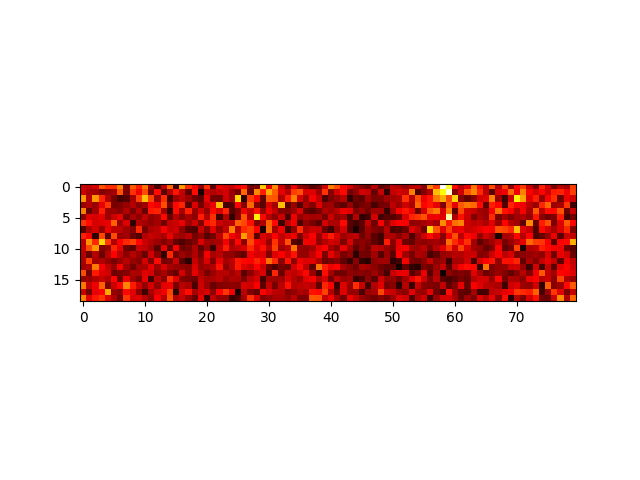

In [443]:
img = np.load("./dddd.npy")
plt.cla()
ax = plt.imshow(img, "hot")
plt.savefig("../output/ddd.jpg")

In [ ]:

# def regularize(prob, norm, percentile):
#     # First save the original prob matrix as heat-map
#     f = plt.figure(1)
#     sns.heatmap(prob, xticklabels=False, yticklabels=False)
#     f.savefig('occ_exp/heatmap_' + img_path.split('/')[-1])

#     # Apply Regularization
#     prob = normalize_clip(prob) if norm else prob
#     clipped = clip_weak_pixel_regularization(prob, percentile=percentile)
#     reg_heat = blur_regularization(1 - clipped, size=(3, 3))

#     # Save regularized heat-map
#     f2 = plt.figure(2)
#     sns.heatmap(reg_heat, xticklabels=False, yticklabels=False)
#     f2.savefig('occ_exp/heatmap_reg_' + img_path.split('/')[-1])

#     return reg_heat


# def join(heat_reg, img, img_size, occ_size):
#     # Get original image
#     image = cv2.imread(img, 1)
#     inp_img = cv2.resize(image, (img_size, img_size))

#     H, W = image.shape[0], image.shape[1]
#     bord = int(occ_size / 2)

#     # Define heat-map to be projected on original image
#     heat_map = cv2.resize(heat_reg,(img_size, img_size)).astype(np.float32)
    
#     # Second way to define heat-map - manually set border values
#     # heat_map = np.zeros((img_size, img_size))
#     # heat_map[bord:img_size - bord, bord:img_size - bord] = cv2.resize(heat_reg,
#     #     (img_size - occ_size, img_size - occ_size)).astype(np.float32)
#     # np.place(heat_map, heat_map == 0.0, np.median(heat_map))

#     # Third way to define heat-map - replicate border values
#     # heatmap = cv2.resize(heat, (img_size-occ_size, img_size-occ_size)).astype(np.float32)
#     # heatmap = cv2.copyMakeBorder(heat-map,bord,bord,bord,bord,cv2.BORDER_REPLICATE)


#     # Original image * heat-map
#     for i in range(3):
#         inp_img[:, :, i] = heat_map * inp_img[:, :, i]
#     inp_viz = cv2.resize(inp_img, (W, H))

#     # Save the final output
#     cv2.imwrite('occ_exp/final_' + img.split('/')[-1], inp_viz)

#     return inp_viz


# def get_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--img', type=str)  # Path of the input image
#     parser.add_argument('--weights_path', type=str, default='vgg16_weights.h5')  # Path of the saved pre-trained model
#     parser.add_argument('--size', type=int, default='224')  # Layer name
#     parser.add_argument('--occ_size', type=int, default='40')  # Size of occluding window
#     parser.add_argument('--pixel', type=int, default='0')  # Occluding window - pixel values
#     parser.add_argument('--stride', type=int, default='5')  # Occlusion Stride
#     parser.add_argument('--norm', type=int, default='1')  # Normalize probabilities first
#     parser.add_argument('--percentile', type=int, default='25')  # Regularization percentile for heatmap
#     args = parser.parse_args()
#     return args